import pandas as pd

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars.csv')

In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [4]:
data.shape

(50001, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [6]:
data.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

In [7]:
data.drop(['dateCrawled', 'dateCreated', 'postalCode', 'lastSeen'], axis=1, inplace=True)

In [8]:
data.shape

(50001, 15)

In [9]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price,50001.0,6559.87,85818.47,0.0,1150.0,2950.0,7190.0,12345678.0
yearOfRegistration,50001.0,2005.54,122.99,1000.0,1999.0,2003.0,2008.0,9999.0
powerPS,50001.0,116.50,230.57,0.0,69.0,105.0,150.0,19312.0
kilometer,50001.0,125613.69,40205.23,5000.0,125000.0,150000.0,150000.0,150000.0
monthOfRegistration,50001.0,5.74,3.71,0.0,3.0,6.0,9.0,12.0


In [10]:
data.isna().sum()

name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dtype: int64

In [11]:
miss_values = data[data.isnull().any(axis=1)]

In [12]:
data.dropna(axis=0, inplace=True)

In [13]:
data.shape

(35107, 15)

In [14]:
data.isna().sum()

name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

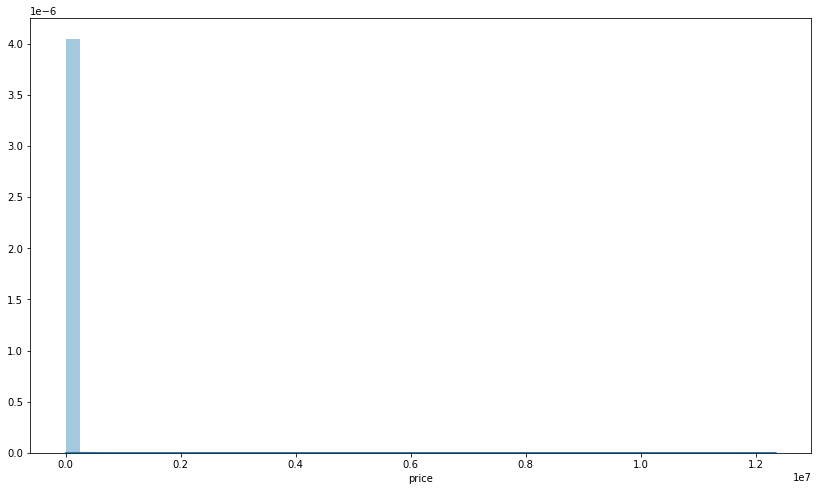

In [15]:
plt.figure(figsize=(14,8))
sns.distplot(data['price'], bins=50, kde=True)

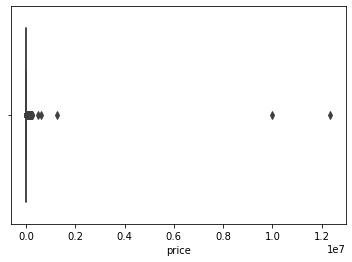

In [16]:
sns.boxplot(data['price'])

In [17]:
data.drop(index = data[data['price']==0].index, axis=0, inplace=True)

In [18]:
data.drop(index = data[data['price']>30000].index, axis=0, inplace=True)

In [19]:
for i in range(1,90):
  data.drop(index = data[data['price']==i].index, axis=0, inplace=True)

In [20]:
data.shape

(33907, 15)

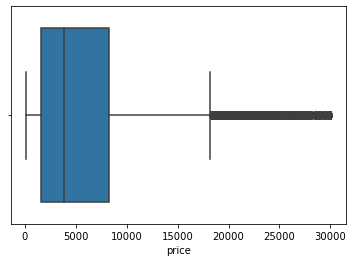

In [21]:
sns.boxplot(data['price'])

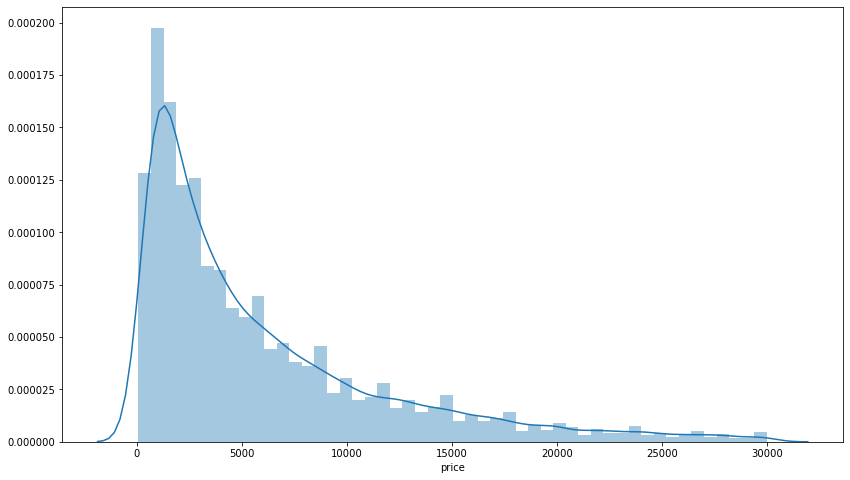

In [22]:
plt.figure(figsize=(14,8))
sns.distplot(data['price'], bins=50, kde=True)

In [23]:
data.drop(index = data[data['monthOfRegistration']==0].index, axis=0, inplace=True)

In [24]:
j= data['yearOfRegistration']<1910

In [25]:
for b in j:
  data.drop(index = data[data['yearOfRegistration']==b].index, axis=0, inplace=True)

In [26]:
a = data['yearOfRegistration']>2019

In [27]:
for x in a:
  data.drop(index = data[data['yearOfRegistration']==x].index, axis=0, inplace=True)

In [28]:
data.shape

(33007, 15)

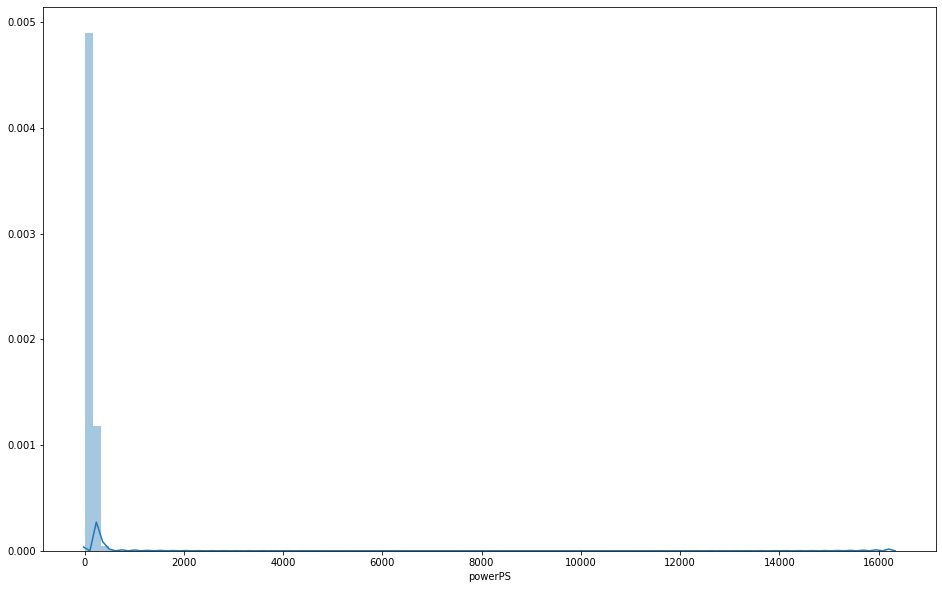

In [29]:
plt.figure(figsize=(16,10))
sns.distplot(data['powerPS'], bins=100)

In [30]:
e = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]

In [31]:
for y in e:
  data.drop(index = data[data['powerPS']==y].index, axis=0, inplace=True)

In [32]:
def createList(r1, r2):
  
    # Testing if range r1 and r2 
    # are equal
    if (r1 == r2):
        return r1
  
    else:
  
        # Create empty list
        res = []
  
        # loop to append successors to 
        # list until r2 is reached.
        while(r1 < r2+1 ):
              
            res.append(r1)
            r1 += 1
        return res
      
# Driver Code
r1, r2 = 350, 19312

In [33]:
n = createList(350, 19312)

In [34]:
len(n)

18963

In [35]:
for z in n:
  data.drop(index = data[data['powerPS']==z].index, axis=0, inplace=True)

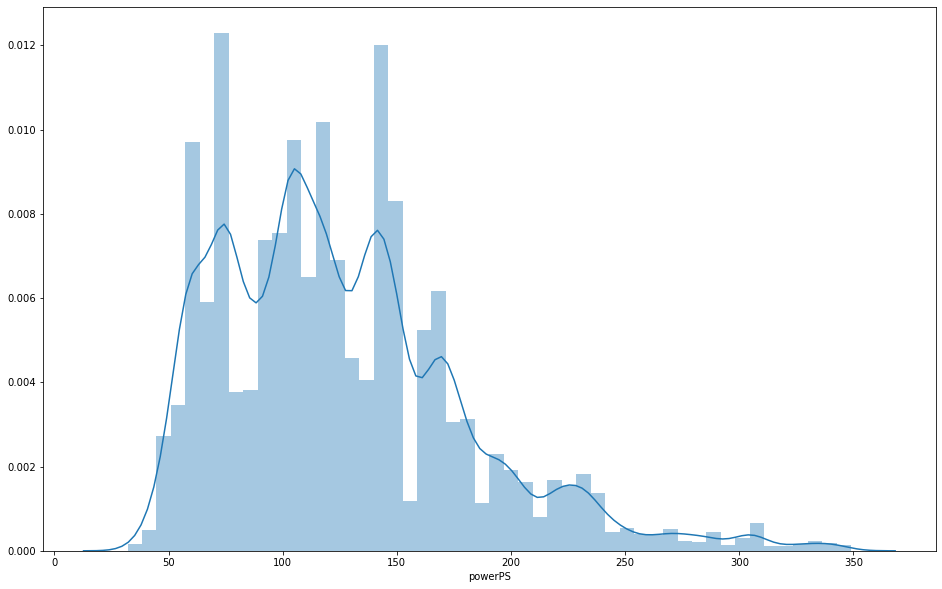

In [36]:
plt.figure(figsize=(16,10))
sns.distplot(data['powerPS'], bins=50)

In [37]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price,31690.0,6079.95,5968.43,90.0,1699.0,3950.0,8499.0,30000.0
yearOfRegistration,31690.0,2003.50,6.10,1936.0,2000.0,2004.0,2008.0,2018.0
powerPS,31690.0,125.78,53.85,32.0,85.0,116.0,150.0,349.0
kilometer,31690.0,125084.25,38668.22,5000.0,100000.0,150000.0,150000.0,150000.0
monthOfRegistration,31690.0,6.37,3.35,1.0,3.0,6.0,9.0,12.0


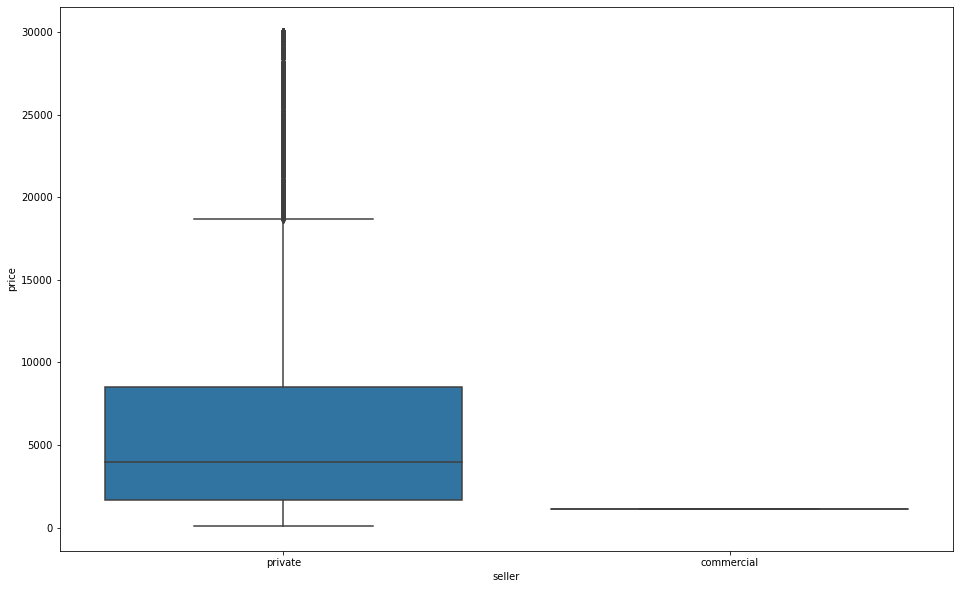

In [38]:
plt.figure(figsize=(16,10))
sns.boxplot(x=data['seller'], y=data['price'])

In [39]:
data['seller'].value_counts()

private       31689
commercial        1
Name: seller, dtype: int64

In [40]:
data.drop(['seller'], axis=1, inplace=True)

In [41]:
data['offerType'].unique()

array(['offer'], dtype=object)

In [42]:
data.drop(['offerType'], axis=1, inplace=True)

In [43]:
data['abtest'].value_counts()

test       16377
control    15313
Name: abtest, dtype: int64

In [44]:
data['vehicleType'].value_counts()

limousine        9495
small car        7199
station wagon    6529
bus              3040
cabrio           2162
coupe            1659
suv              1427
others            179
Name: vehicleType, dtype: int64

In [45]:
data['gearbox'].value_counts()

manual       24605
automatic     7085
Name: gearbox, dtype: int64

In [46]:
data['model'].value_counts()

golf          2567
others        2205
3er           1947
polo          1077
corsa          999
              ... 
9000             1
serie_2          1
move             1
rangerover       1
b_max            1
Name: model, Length: 245, dtype: int64

In [47]:
data['fuelType'].value_counts()

petrol     20425
diesel     10672
lpg          498
cng           61
hybrid        30
other          2
electro        2
Name: fuelType, dtype: int64

In [48]:
data['monthOfRegistration'].value_counts()

3     3402
6     3089
4     2919
5     2899
7     2713
10    2553
9     2481
11    2426
12    2367
1     2305
8     2281
2     2255
Name: monthOfRegistration, dtype: int64

In [49]:
data['brand'].value_counts()

volkswagen       6644
bmw              3719
mercedes_benz    3221
opel             3166
audi             3025
ford             2122
renault          1424
peugeot          1017
fiat              730
seat              645
skoda             572
mazda             498
citroen           457
toyota            453
nissan            451
smart             432
mini              361
volvo             354
hyundai           334
mitsubishi        254
honda             219
kia               219
suzuki            209
alfa_romeo        187
chevrolet         150
chrysler          123
porsche           112
dacia             101
subaru             85
jeep               67
saab               55
daihatsu           52
jaguar             50
land_rover         49
daewoo             42
lancia             38
rover              34
lada               17
trabant             2
Name: brand, dtype: int64

In [50]:
data['notRepairedDamage'].value_counts()

no     28632
yes     3058
Name: notRepairedDamage, dtype: int64

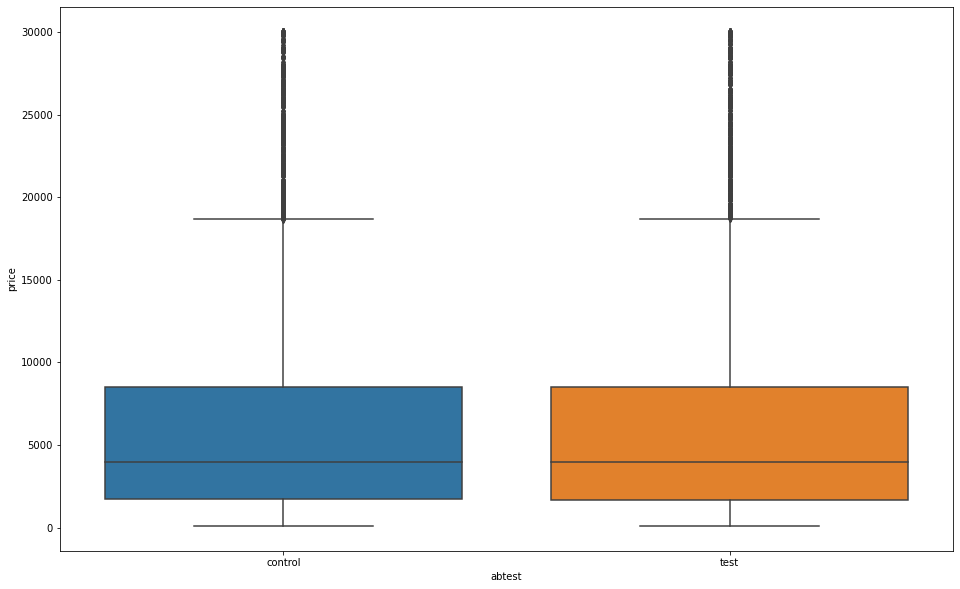

In [51]:
plt.figure(figsize=(16,10))
sns.boxplot(x=data['abtest'], y=data['price'], )

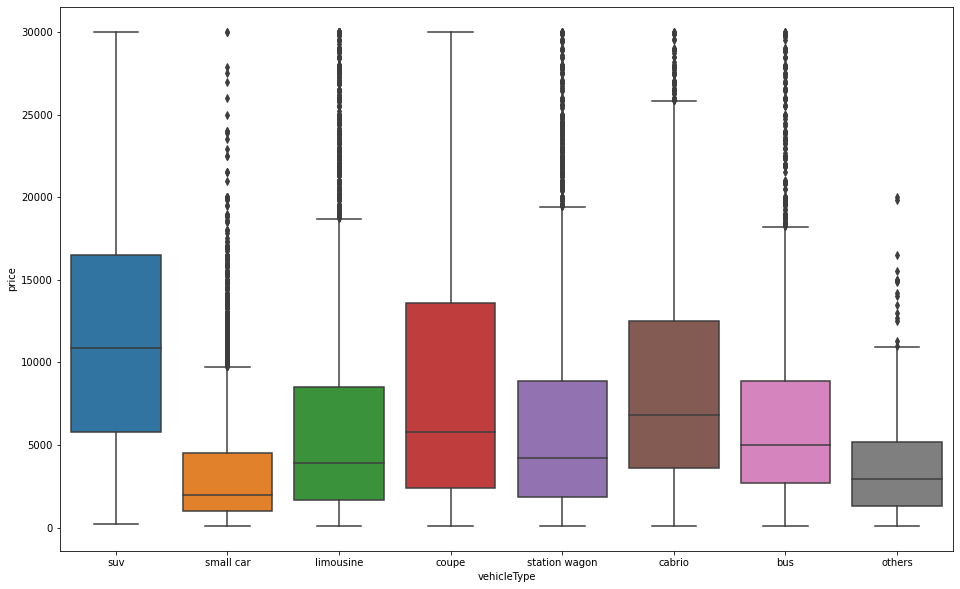

In [52]:
plt.figure(figsize=(16,10))
sns.boxplot(x=data['vehicleType'], y=data['price'], )

In [53]:
data.columns

Index(['name', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'powerPS', 'model', 'kilometer', 'monthOfRegistration',
       'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [54]:
data.shape

(31690, 13)

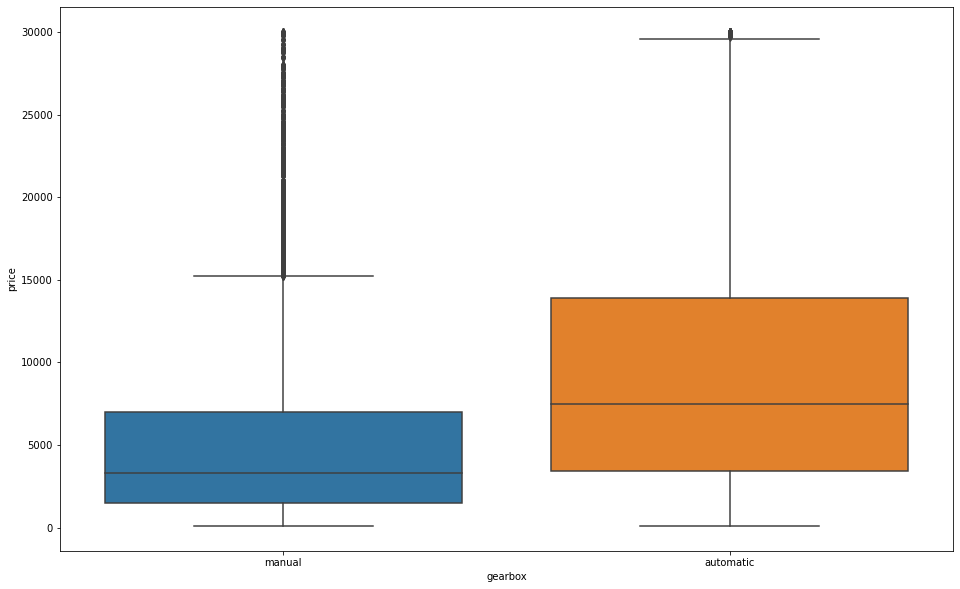

In [55]:
plt.figure(figsize=(16,10))
sns.boxplot(x=data['gearbox'], y=data['price'])

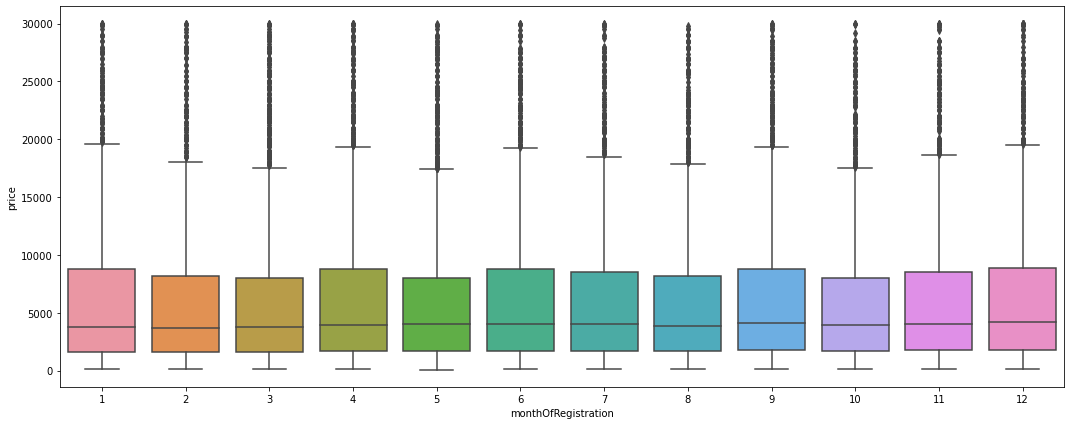

In [56]:
plt.figure(figsize=(18,7))
sns.boxplot(x=data['monthOfRegistration'], y=data['price'])

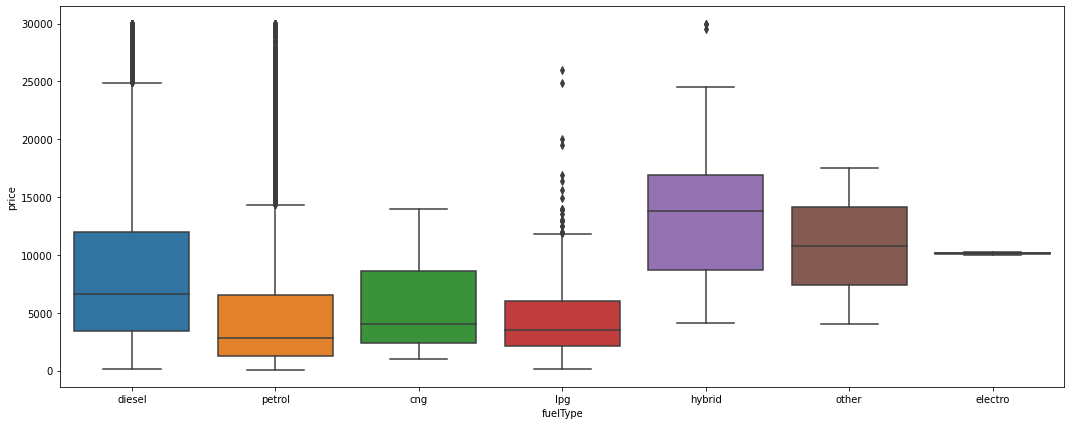

In [57]:
plt.figure(figsize=(18,7))
sns.boxplot(x=data['fuelType'], y=data['price'])

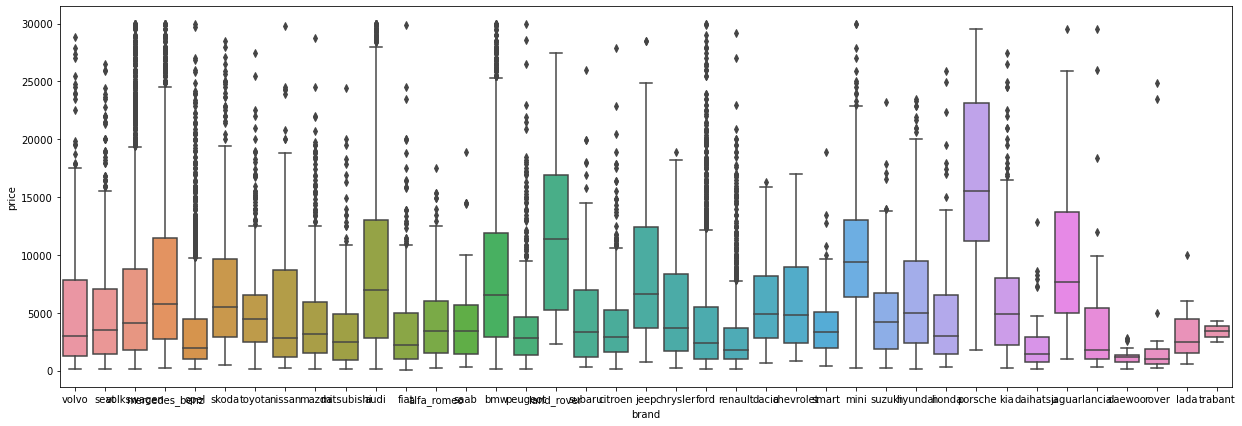

In [58]:
plt.figure(figsize=(21,7))
sns.boxplot(x=data['brand'], y=data['price'])

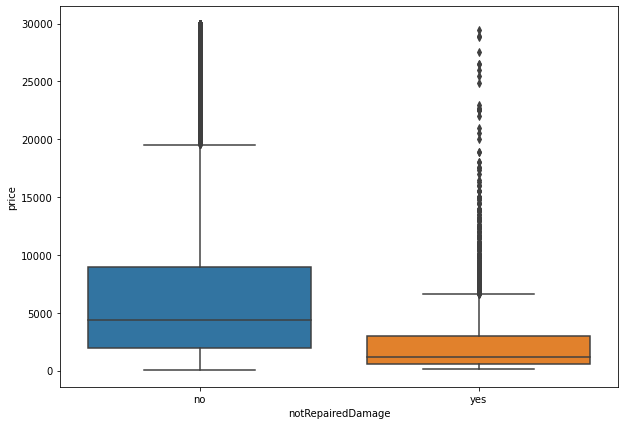

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x=data['notRepairedDamage'], y=data['price'])

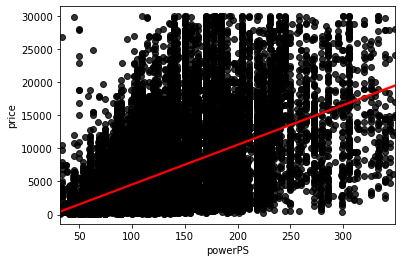

In [60]:
sns.regplot(x=data['powerPS'], y=data['price'], scatter_kws={"color": "black"}, line_kws={"color": "red"} )

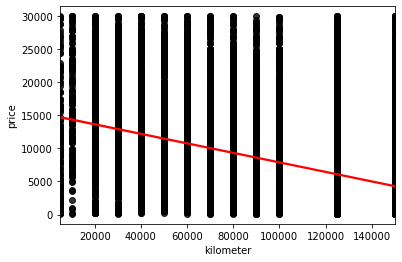

In [61]:
sns.regplot(x=data['kilometer'], y=data['price'], scatter_kws={"color": "black"}, line_kws={"color": "red"} )

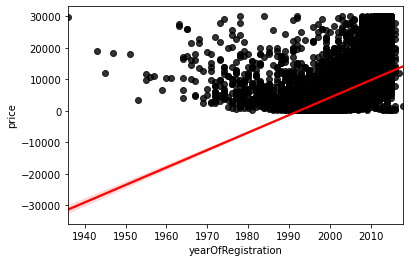

In [62]:
sns.regplot(x=data['yearOfRegistration'], y=data['price'], scatter_kws={"color": "black"}, line_kws={"color": "red"} )

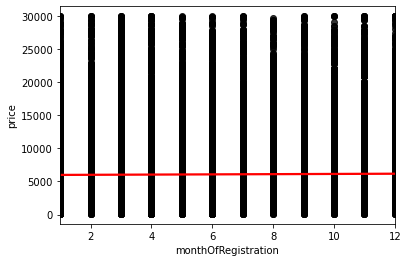

In [63]:
sns.regplot(x=data['monthOfRegistration'], y=data['price'], scatter_kws={"color": "black"}, line_kws={"color": "red"} )

In [64]:
data.drop(['name'], axis=1, inplace=True)

In [65]:
data.drop(['monthOfRegistration'], axis=1, inplace=True)

# column monthOfRegistration was deleted because in box plots also we can see that there is no much variations between month wise and even in scatter plot we can see the regression line is flat and slope is almost zero.

In [66]:
data.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [67]:
data.shape

(31690, 11)

In [68]:
data.drop(['abtest'], axis=1, inplace=True)

In [69]:
data['gearbox'].unique()

array(['manual', 'automatic'], dtype=object)

In [70]:
data['gearbox']= data['gearbox'].map({'manual':0, 'automatic':1})

In [71]:
data['notRepairedDamage'].unique()

array(['no', 'yes'], dtype=object)

In [72]:
data['notRepairedDamage']= data['notRepairedDamage'].map({'no':0, 'yes':1})

In [73]:
data.shape

(31690, 10)

In [74]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price,31690.0,6079.95,5968.43,90.0,1699.0,3950.0,8499.0,30000.0
yearOfRegistration,31690.0,2003.50,6.10,1936.0,2000.0,2004.0,2008.0,2018.0
gearbox,31690.0,0.22,0.42,0.0,0.0,0.0,0.0,1.0
powerPS,31690.0,125.78,53.85,32.0,85.0,116.0,150.0,349.0
kilometer,31690.0,125084.25,38668.22,5000.0,100000.0,150000.0,150000.0,150000.0
notRepairedDamage,31690.0,0.10,0.30,0.0,0.0,0.0,0.0,1.0


In [75]:
data.columns

Index(['price', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

In [76]:
data['vehicleType'].value_counts()

limousine        9495
small car        7199
station wagon    6529
bus              3040
cabrio           2162
coupe            1659
suv              1427
others            179
Name: vehicleType, dtype: int64

In [77]:
new_df=pd.get_dummies(data,drop_first=True)

In [78]:
new_df.shape

(31690, 301)

In [79]:
new_df.columns

Index(['price', 'yearOfRegistration', 'gearbox', 'powerPS', 'kilometer',
       'notRepairedDamage', 'vehicleType_cabrio', 'vehicleType_coupe',
       'vehicleType_limousine', 'vehicleType_others',
       ...
       'brand_saab', 'brand_seat', 'brand_skoda', 'brand_smart',
       'brand_subaru', 'brand_suzuki', 'brand_toyota', 'brand_trabant',
       'brand_volkswagen', 'brand_volvo'],
      dtype='object', length=301)

In [80]:
new_df.shape

(31690, 301)

In [81]:
x=new_df.drop(['price'],axis=1)

In [82]:
x.shape

(31690, 300)

In [83]:
y=new_df['price']

In [84]:
y.shape

(31690,)

In [85]:
y

1        13299
3         4500
4        18750
5          988
7         1399
         ...  
49991    10900
49992      790
49993      830
49995     2290
50000     1100
Name: price, Length: 31690, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [87]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
##
y_pred=regressor.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred))


3096.1662401008007

In [89]:
errors = mean_squared_error(y_test,y_pred, squared=False)

In [90]:
print(errors)

3096.1662401008007


In [91]:
from sklearn.metrics import mean_absolute_error

In [92]:
errors_1 = mean_absolute_error(y_test,y_pred)

In [93]:
print(errors_1)

2136.8567630186526


In [94]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [95]:
MAPE(y_test,y_pred)

88.01819419393098

In [96]:
regressor.coef_, 2


(array([ 3.24497059e+02,  8.30503709e+02,  3.80362300e+01, -5.32430160e-02,
        -1.46164636e+03,  2.07050896e+03,  1.26138929e+03,  3.26590606e+02,
        -3.06711584e+02,  3.87744580e+02,  1.77695070e+02,  1.27638025e+03,
        -1.94137426e+03, -2.25025769e+03, -3.81689933e+02, -3.01235443e+02,
        -9.94145545e+03, -7.14953785e-09, -1.14288921e+03, -1.11373871e+03,
        -5.45701716e+02, -1.12253789e+04, -1.53603812e+03, -1.73431856e+03,
         1.55940428e+03, -1.11904041e+04,  4.32100933e-09, -1.33738141e+03,
        -9.04089001e+03, -1.17978532e+04, -5.54939570e+02, -1.25118232e+03,
         7.04689871e+02,  5.06997247e+03, -2.94896215e+03, -6.19136667e+02,
         2.51201862e+02, -9.75263735e+02, -1.02923155e+03, -1.64220703e+03,
         4.32459745e+03, -1.96672468e+03, -4.49023111e+03, -3.76135888e+03,
         2.23320108e+02, -2.89663748e+03, -1.15238542e+02, -1.31571066e+03,
        -1.23871698e+03,  1.84125256e+03, -2.65381182e+03, -5.19904033e+02,
        -3.3

In [97]:
regressor.intercept_

-643878.6066607154

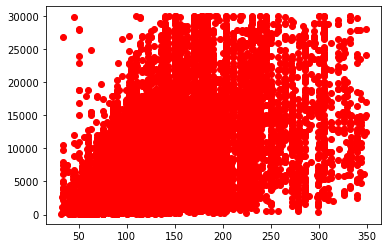

In [98]:
plt.scatter(data['powerPS'],data["price"],color='red')

In [99]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7343718793185947